In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import matplotlib.dates as dates
%matplotlib inline

In [2]:
DATA = []
DATA.append(pd.read_csv('TCS.csv'))
DATA.append(pd.read_csv('TATASTL.csv'))
DATA.append(pd.read_csv('BAJAJ.csv'))

## Moving Average
This function is used for generate a sma for a period of a 

In [3]:
def mav(y,a):
    mov_avg = 0.0
    avg = []
    for i in range(a-1):
        mov_avg+=y[i]
        avg.append(0)
    for i in range(a-1,len(y)):
        if i == (a-1):
            mov_avg += y[i]
        else:
            mov_avg += (y[i] - y[i-a])
        avg.append(mov_avg/float(a))
        #print(mov_avg/float(a))
    return avg



## Exponential Moving Average 
this function  generates the ema for a period of 'a' with the multiplier 'b'

In [4]:
def emav(y,a,b):
    mov_avg = 0.0
    mult = b/(a + 1)
    avg = []
    for i in range(a-1):
        mov_avg+=y[i]
        avg.append(0)
    for i in range(a-1,len(y)):
        if i == (a-1):
            mov_avg += y[i]
            mov_avg = mov_avg*mult
        else:
            mov_avg = (y[i] - avg[i-1])*mult + avg[i-1] 
        avg.append(mov_avg)
        #print(mov_avg/float(a))
    return avg


## Weighted Moving Average
this function generates the weighted moving avergae with a periord of 'a' and with weights 'b'

In [5]:

def wmav(y,a,b):
    avg = []
    for i in range(a-1):
        avg.append(0)
    for i in range(a-1,len(y)):
        mov_avg = 0.0
        for j in range(a):
            mov_avg += y[i-j]*b[j]
        avg.append(mov_avg/float(a))
        #print(mov_avg/float(a))
    return avg 


## Double Crossover Trading Algorithm
this function trades on a stock based on the crossover of the longterm and shortterm moving averages

In [6]:
def doubleCross(a,b,y):
    y1 = mav(y,a)
    y2 = mav(y,b)
    asset = 1000000
    stock = 0
    eval= [0]*len(y)
    for i in range(51,len(y)):
        if y1[i] > y2[i] and (asset-y[i]) >=0 :
            stock+=1
            asset-=y[i]
        elif y1[i] < y2[i] and stock >0:
            stock-=1
            asset+=y[i]
        eval[i] = (stock*y[i] + asset)
    profit = (stock*y[len(y)-1] + asset)
    return eval,profit


## Tripple CrossOver Trading Algorithm
this function trades on a stock based on the crossover of the longterm, shortterm and medium term moving averages

In [7]:

def trippleCross(a,b,c,y):
    y1 = mav(y,a)
    y2 = mav(y,b)
    y3 = mav(y,c)
    asset = 1000000
    stock = 0
    eval= [0]*len(y)
    for i in range(51,len(y)):
        if y1[i] < y3[i] and y3[i] > y2[i] and y2[i] > y1[i] and stock >0:
            stock-=1
            asset+=y[i]
        elif y1[i] > y2[i] and y1[i] > y3[i] and y2[i] > y3[i] and  (asset-y[i]) >=0:
            stock+=1
            asset-=y[i]
        cur_profit = (stock*y[i] + asset)
        eval[i] = cur_profit
    profit = stock*y[len(y)-1] + asset
    return eval,profit


## Tripple CrossOver based on Exponential Moving Averades
this function trades on a stock based on the crossover of shortterm and mediumterm EMA and a longterm SMA

In [8]:

def expoTrippleCross(a1,a2,b1,b2,c,y):
    y1 = emav(y,a1,a2)
    y2 = emav(y,b1,b2)
    y3 = mav(y,c)
    asset = 1000000
    stock = 0
    eval= [0]*len(y)
    for i in range(51,len(y)):
        if y1[i] < y3[i] and y3[i] > y2[i] and y2[i] > y1[i] and stock >0 :
            stock-=1
            asset+=y[i]
        elif y1[i] > y2[i] and y1[i] > y3[i] and y2[i] > y3[i] and (asset-y[i]) >=0:
            stock+=1
            asset-=y[i]
        eval[i] = (stock*y[i] + asset)
    profit = stock*y[len(y)-1] + asset
    return eval,profit


## Moving Average Convergence Divergence (MACD)
This function uses the EMA for short and medium term ma ,and also calculates the MACD and the signal line ,
It uses the crossover between MACD and the signal

In [9]:

def MACD(a1,a2,b1,b2,c1,c2,y):
    y1 = emav(y,a1,a2)
    y2 = emav(y,b1,b2)
    y3 = [0]*len(y1)
    for i in range(len(y1)):
        y3[i] = y1[i] - y2[i]
    y4 = emav(y3,c1,c2)
    histo = [0]*len(y2)
    for i in range(len(y3)):
        histo[i] = y3[i] - y4[i]
    
    asset = 1000000
    stock = 0
    eval= [0]*len(y)
    for i in range(51,len(y)):
        if y3[i] > y4[i] and (asset-y[i]) >=0 :
            stock+=1
            asset-=y[i]
        elif y3[i] < y4[i] and stock >0:
            stock-=1
            asset+=y[i]
        eval[i] = (stock*y[i] + asset)
        
    profit = stock*y[len(y)-1] + asset
    return eval,y3,y4,histo,profit


## Moving Average Convergence Divergence with MACD sign Crossover
This function uses the EMA for short and medium term ma ,and also calculates the MACD and the signal line ,
It uses the change of sign in MACD to trade .

In [10]:

def MACD_NG(a1,a2,b1,b2,c1,c2,y):
    y1 = emav(y,a1,a2)
    y2 = emav(y,b1,b2)
    y3 = [0]*len(y1)
    for i in range(len(y1)):
        y3[i] = y1[i] - y2[i]
    y4 = emav(y3,c1,c2)
    histo = [0]*len(y2)
    for i in range(len(y3)):
        histo[i] = y3[i] - y4[i]
    asset = 1000000
    stock = 0
    eval= [0]*len(y)
    for i in range(51,len(y)):
        if y3[i] > 0 and y3[i-1] < 0 and (asset-y[i]) >=0 :
            stock+=1
            asset-=y[i]
        elif y3[i] < 0 and y3[i] > 0 and stock >0:
            stock-=1
            asset+=y[i]
        eval[i] = (stock*y[i] + asset)
        
    profit = stock*y[len(y)-1] + asset
    return eval,profit

## Ploting the Stock Prices , The MAs and Profits Corresponding to various Profits
## TCS

/usr/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


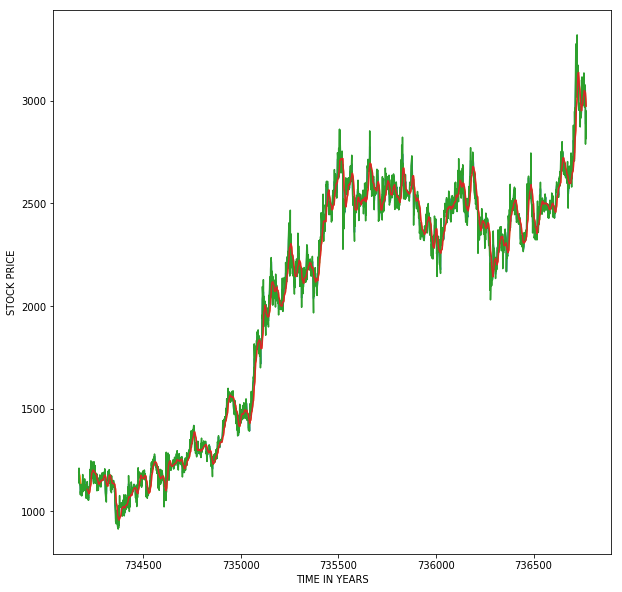

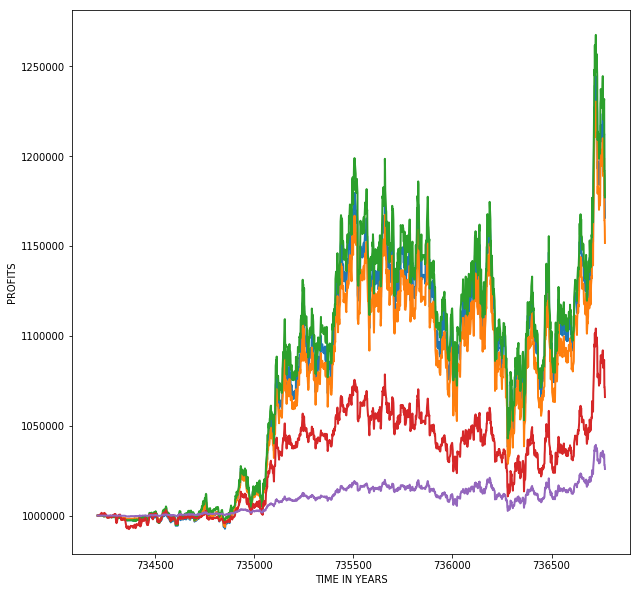

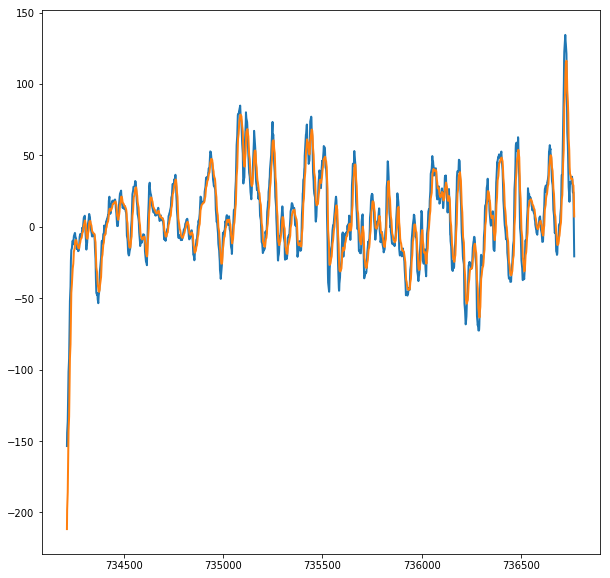

In [11]:
i = 1
x = []
y = []
for i in DATA[0]['Date']:
    x.append(i)
for i in DATA[0]['Close Price']:
    y.append(i)
new_x = dates.datestr2num(x)
plt.figure(i,(10, 10))
new_y = mav(y,10)
emv = emav(y,2,5)
wav = wmav(y,5,[1,1,1,1,1])
plt.figure(i,(10, 10))
plt.subplot(111).set_xlabel('TIME IN YEARS')
plt.subplot(111).set_ylabel('STOCK PRICE')
plt.subplot(111)
plt.plot(new_x[20:],y[20:])
plt.subplot(111)
plt.plot(new_x[20:],new_y[20:])
plt.subplot(111)
plt.plot(new_x[20:],emv[20:])
plt.subplot(111)
plt.plot(new_x[51:],new_y[51:])
i+=1
y1 = mav(y,5)
y2 = mav(y,15)
tp,profit = doubleCross(5,10,y)
tp1,profit1 = trippleCross(5,10,15,y)
tp2,profit2 = expoTrippleCross(5,2,15,3,20,y)
tp3,macdl,signal,histo,profit3 = MACD(12,2,26,2,9,2,y)
tp4,profit4 = MACD_NG(12,2,26,2,9,2,y)
#print(profit,profit1,profit2,profit3,profit4)
plt.figure(i,(10, 10))
plt.subplot(111).set_xlabel('TIME IN YEARS')
plt.subplot(111).set_ylabel('PROFITS')
plt.subplot(111)
plt.plot(new_x[51:],tp[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp1[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp2[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp3[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp4[51:], linewidth=2.0)
i+=1
plt.figure(i,(10, 10))
plt.subplot(111)
plt.plot(new_x[51:],macdl[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],signal[51:], linewidth=2.0)
plt.subplot(111)

## Ploting the Stock Prices , The MAs and Profits Corresponding to various Profits
## TATA STEEL

/usr/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


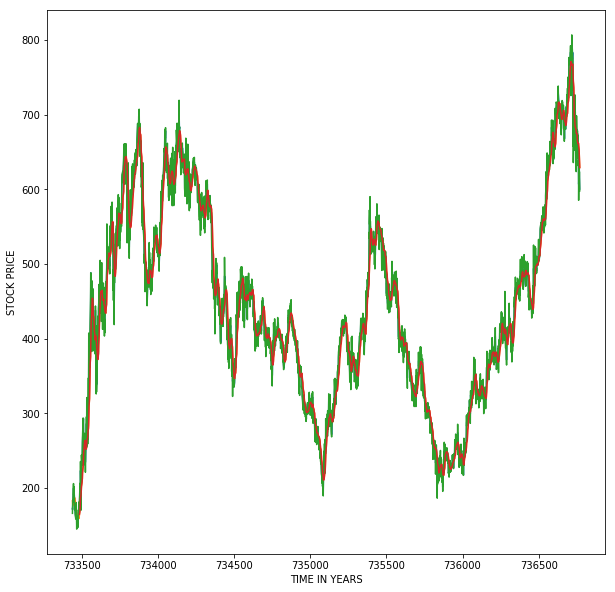

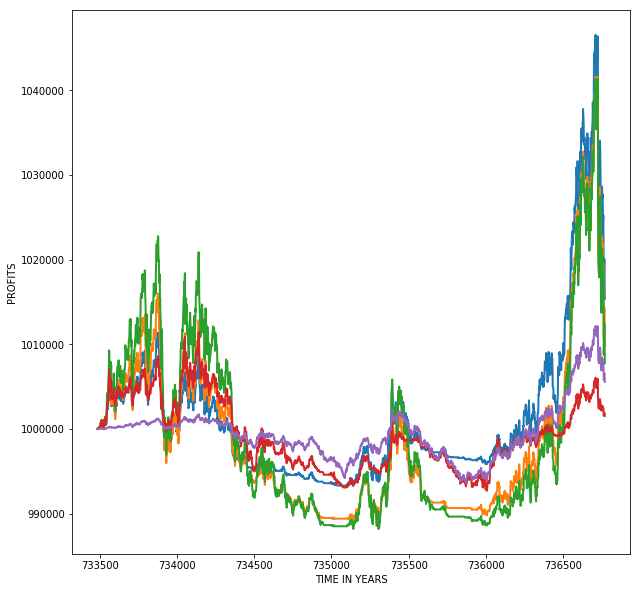

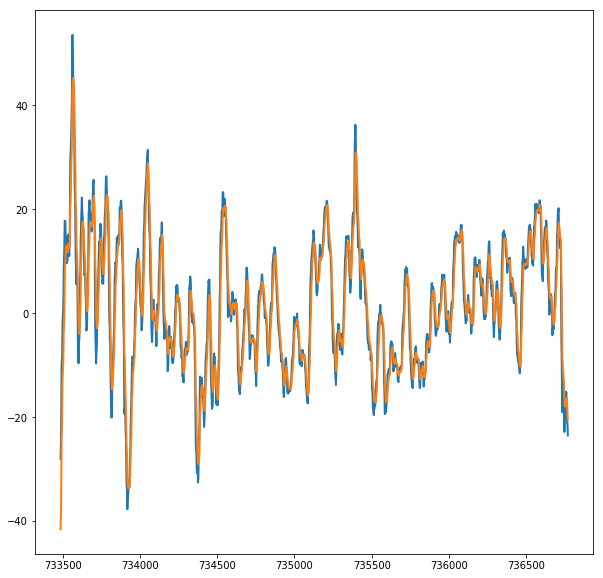

In [12]:
i = 1
x = []
y = []
for i in DATA[1]['Date']:
    x.append(i)
for i in DATA[1]['Close Price']:
    y.append(i)
new_x = dates.datestr2num(x)
plt.figure(i,(10, 10))
new_y = mav(y,10)
emv = emav(y,2,5)
wav = wmav(y,5,[1,1,1,1,1])
plt.figure(i,(10, 10))
plt.subplot(111).set_xlabel('TIME IN YEARS')
plt.subplot(111).set_ylabel('STOCK PRICE')
plt.subplot(111)
plt.plot(new_x[20:],y[20:])
plt.subplot(111)
plt.plot(new_x[20:],new_y[20:])
plt.subplot(111)
plt.plot(new_x[20:],emv[20:])
plt.subplot(111)
plt.plot(new_x[51:],new_y[51:])
i+=1
y1 = mav(y,5)
y2 = mav(y,15)
tp,profit = doubleCross(5,10,y)
tp1,profit1 = trippleCross(5,15,20,y)
tp2,profit2 = expoTrippleCross(5,2,15,3,20,y)
tp3,macdl,signal,histo,profit3 = MACD(12,2,26,2,9,2,y)
tp4,profit4 = MACD_NG(12,2,26,2,9,2,y)
#print(profit,profit1,profit2,profit3,profit4)
plt.figure(i,(10, 10))
plt.subplot(111).set_xlabel('TIME IN YEARS')
plt.subplot(111).set_ylabel('PROFITS')
plt.subplot(111)
plt.plot(new_x[51:],tp[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp1[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp2[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp3[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp4[51:], linewidth=2.0)
i+=1
plt.figure(i,(10, 10))
plt.subplot(111)
plt.plot(new_x[51:],macdl[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],signal[51:], linewidth=2.0)
plt.subplot(111)

## Ploting the Stock Prices , The MAs and Profits Corresponding to various Profits
## BAJAJ

/usr/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


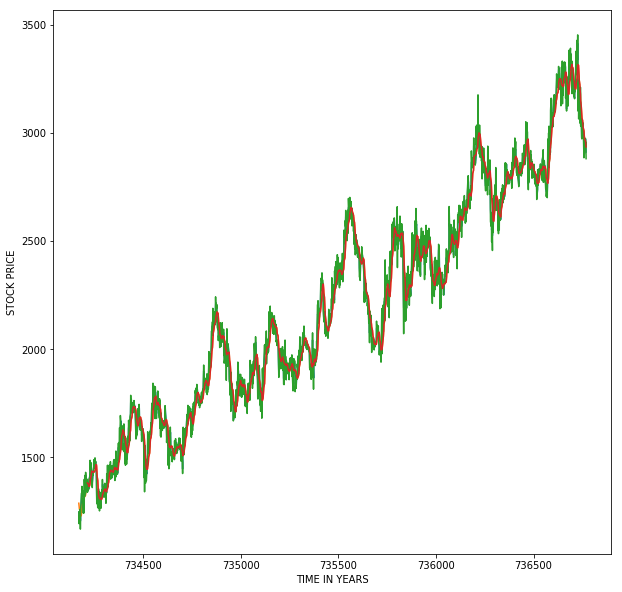

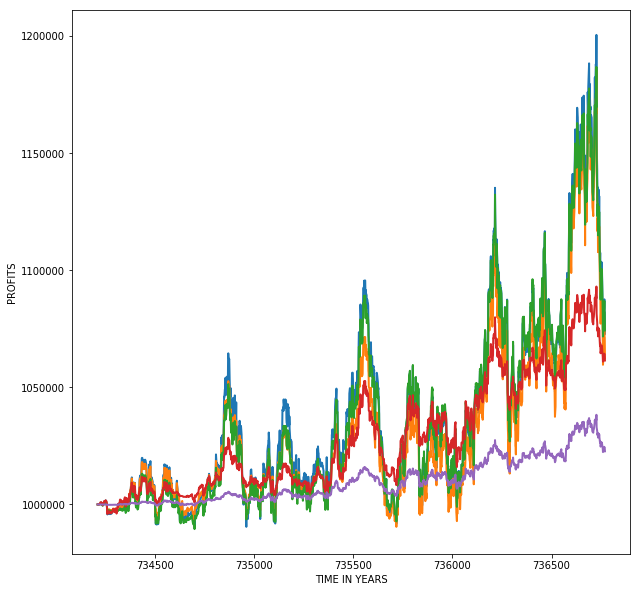

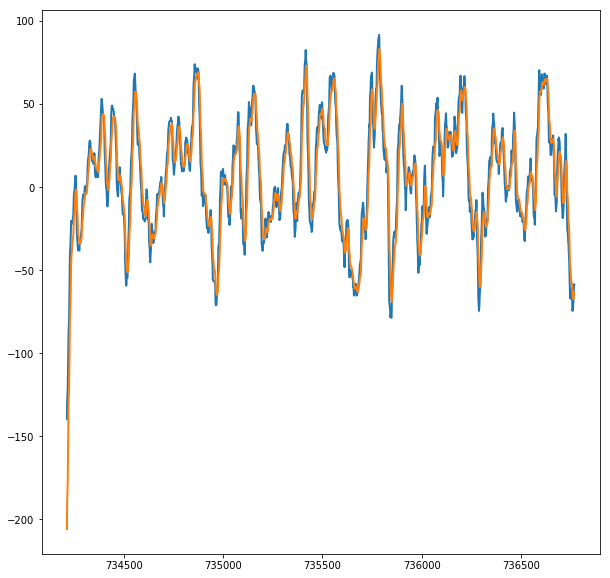

In [13]:
i = 1
x = []
y = []
for i in DATA[2]['Date']:
    x.append(i)
for i in DATA[2]['Close Price']:
    y.append(i)
new_x = dates.datestr2num(x)
plt.figure(i,(10, 10))
new_y = mav(y,10)
emv = emav(y,2,5)
wav = wmav(y,5,[1,1,1,1,1])
plt.figure(i,(10, 10))
plt.subplot(111).set_xlabel('TIME IN YEARS')
plt.subplot(111).set_ylabel('STOCK PRICE')
plt.subplot(111)
plt.plot(new_x[20:],y[20:])
plt.subplot(111)
plt.plot(new_x[20:],new_y[20:])
plt.subplot(111)
plt.plot(new_x[20:],emv[20:])
plt.subplot(111)
plt.plot(new_x[51:],new_y[51:])
i+=1
y1 = mav(y,5)
y2 = mav(y,15)
tp,profit = doubleCross(15,40,y)
tp1,profit1 = trippleCross(15,20,40,y)
tp2,profit2 = expoTrippleCross(10,3,20,4,35,y)
tp3,macdl,signal,histo,profit3 = MACD(12,2,26,2,9,2,y)
tp4,profit4 = MACD_NG(12,2,26,2,9,2,y)
#print(profit,profit1,profit2,profit3,profit4)
plt.figure(i,(10, 10))
plt.subplot(111).set_xlabel('TIME IN YEARS')
plt.subplot(111).set_ylabel('PROFITS')
plt.subplot(111)
plt.plot(new_x[51:],tp[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp1[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp2[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp3[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp4[51:], linewidth=2.0)
i+=1
plt.figure(i,(10, 10))
plt.subplot(111)
plt.plot(new_x[51:],macdl[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],signal[51:], linewidth=2.0)
plt.subplot(111)

# Parammeter Optimization

In [14]:
import nn
import numpy as np
from random import uniform
from tqdm import tqdm

## Neural Network for paramater selection

### The neural network used to select is a simple encoder-decoder


![nn.png](media/nn.png)

### error1 -> for encoder
#### H is used for calculating error. 1.0 means most profit while 0.0 means most loss.

### error2 -> for autoencoder (X==Y)
#### This is reconstruction error. The encoder is frozen while backproping this error.

### After training to get best paramater use decoder and put H = 1.0

#### Double Cross strategy
This function generates random paramaters and fit it on neural network as mention above.

In [15]:
def best_parameters_doublecross(y, n_samples = 1000):
    dc_nn = nn.NeuralNetwork(2, 3)
    asset = 1000000
    max_profit = 1000000
    max_loss = 1000000
    for spl in tqdm(range(n_samples)):
        b = uniform(0.02, 0.5)
        a = uniform(0.02, b)
        _, profit = doubleCross(int(a*100),int(b*100), y)
        if profit >= asset:
            t_profit = profit - asset
            max_profit = max(max_profit, profit)
            if max_profit == asset:
                ml_y = 0.5
            else:
                ml_y = 0.5 + (t_profit)/(max_profit - asset)
        else:
            t_loss = asset - profit
            max_loss = min(max_loss, profit)
            if max_profit == asset:
                ml_y = 0.5
            else:
                ml_y = 0.5 - (t_loss)/(asset - max_loss)

        dc_nn.fit1(np.array([a,b]), np.array([ml_y]))

    dc_pred = dc_nn.predict()
    _, profit = doubleCross(int(dc_pred[0][0]*100), int(dc_pred[0][1]*100), y)
    print("Double Cross Strategy")
    print("Best Parameters : ", int(dc_pred[0][0]*100), int(dc_pred[0][1]*100))
    print("Profit : ", profit)

#### Triple Cross strategy

In [16]:
def best_parameters_triplecross(y, n_samples = 1000):
    tc_nn = nn.NeuralNetwork(3, 5)
    asset = 1000000
    max_profit = 1000000
    max_loss = 1000000
    for spl in tqdm(range(n_samples)):
        c = uniform(0.02, 0.5)
        b = uniform(0.02, c)
        a = uniform(0.02, b)
        _, profit = trippleCross(int(a*100),int(b*100),int(c*100),y)
        if profit >= asset:
            t_profit = profit - asset
            max_profit = max(max_profit, profit)
            if max_profit == asset:
                ml_y = 0.5
            else:
                ml_y = 0.5 + (t_profit)/(max_profit - asset)
        else:
            t_loss = asset - profit
            max_loss = min(max_loss, profit)
            if max_profit == asset:
                ml_y = 0.5
            else:
                ml_y = 0.5 - (t_loss)/(asset - max_loss)

        tc_nn.fit1(np.array([a,b,c]), np.array([ml_y]))

    tc_pred = tc_nn.predict()
    _, profit = trippleCross(int(tc_pred[0][0]*100), int(tc_pred[0][1]*100), int(tc_pred[0][2]*100), y)
    print("Triple Cross Strategy")
    print("Best Parameters : ", int(tc_pred[0][0]*100), int(tc_pred[0][1]*100), int(tc_pred[0][2]*100))
    print("Profit : ", profit)

#### Exponential Triple Cross strategy

In [17]:
def best_parameters_exotriplecross(y, n_samples = 1000):
    etc_nn = nn.NeuralNetwork(5, 7)
    asset = 1000000
    max_profit = 1000000
    max_loss = 1000000
    for spl in tqdm(range(n_samples)):
        c = uniform(0.02, 0.5)
        b1 = uniform(0.02, c)
        b2 = uniform(0.02, b1)
        a1 = uniform(0.02, b1)
        a2 = uniform(0.02, a1)
        _, profit = expoTrippleCross(int(a1*100),int(a2*100),int(b1*100), int(b2*100), int(c*100), y)
        if profit >= asset:
            t_profit = profit - asset
            max_profit = max(max_profit, profit)
            if max_profit == asset:
                ml_y = 0.5
            else:
                ml_y = 0.5 + (t_profit)/(max_profit - asset)
        else:
            t_loss = asset - profit
            max_loss = min(max_loss, profit)
            if max_profit == asset:
                ml_y = 0.5
            else:
                ml_y = 0.5 - (t_loss)/(asset - max_loss)

        etc_nn.fit1(np.array([a1, a2, b1, b2, c]), np.array([ml_y]))

    etc_pred = etc_nn.predict()
    _, profit = expoTrippleCross(int(etc_pred[0][0]*100), int(etc_pred[0][1]*100), int(etc_pred[0][2]*100), 
                                 int(etc_pred[0][3]*100), int(etc_pred[0][4]*100), y)
    print("Exponential Triple Cross Strategy")
    print("Best Parameters : ", int(etc_pred[0][0]*100), int(etc_pred[0][1]*100), int(etc_pred[0][2]*100),
                                 int(etc_pred[0][3]*100), int(etc_pred[0][4]*100))
    print("Profit : ", profit)

## TCS

In [18]:
y = []
for i in DATA[0]['Close Price']:
    y.append(i)

best_parameters_doublecross(y)
best_parameters_triplecross(y)
best_parameters_exotriplecross(y)

  1%|▏         | 13/1000 [00:00<00:08, 122.88it/s]

Double Cross Strategy
Best Parameters :  14 27
Profit :  1182234.6999999993


  2%|▏         | 15/1000 [00:00<00:06, 141.09it/s]

Triple Cross Strategy
Best Parameters :  7 11 25
Profit :  1163346.7499999981


100%|██████████| 1000/1000 [00:07<00:00, 142.02it/s]

Exponential Triple Cross Strategy
Best Parameters :  7 4 14 7 28
Profit :  1165415.7999999993


## TATASTL

In [19]:
y = []
for i in DATA[1]['Close Price']:
    y.append(i)

best_parameters_doublecross(y)
best_parameters_triplecross(y)
best_parameters_exotriplecross(y)

  1%|          | 8/1000 [00:00<00:13, 73.82it/s]

Double Cross Strategy
Best Parameters :  14 25
Profit :  1004789.8499999995


  1%|          | 11/1000 [00:00<00:09, 104.86it/s]

Triple Cross Strategy
Best Parameters :  8 13 23
Profit :  1008884.0999999989


100%|██████████| 1000/1000 [00:08<00:00, 111.91it/s]

Exponential Triple Cross Strategy
Best Parameters :  7 4 14 7 30
Profit :  1006315.8999999998


## BAJAJ

In [20]:
y = []
for i in DATA[2]['Close Price']:
    y.append(i)

best_parameters_doublecross(y)
best_parameters_triplecross(y)
best_parameters_exotriplecross(y)

  1%|          | 6/1000 [00:00<00:16, 59.74it/s]

Double Cross Strategy
Best Parameters :  14 28
Profit :  1036864.7500000035


  1%|          | 11/1000 [00:00<00:09, 102.30it/s]

Triple Cross Strategy
Best Parameters :  7 13 26
Profit :  1042490.6000000028


100%|██████████| 1000/1000 [00:07<00:00, 140.33it/s]

Exponential Triple Cross Strategy
Best Parameters :  7 4 14 7 31
Profit :  1056812.9500000014
